We have built some basic multi-layer perception models (MLP) in previous lecture, now it is important to dig deeper into how exactly TensorFlow works. In this lecture we focus on operations of tensors and explain how ANN fit into this tensor operations' framework.

We mainly follow the chapter from the book 'Deep Learning with Python' by Collett (2018) combined with Jose Portilla's online course notes for his lectures on data science and deep learning from Udemy. We also draw information from the guide of the TensorFlow platform.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

%matplotlib inline

As we have seen before, the core building block of neural networks is the **layer**, a data-processing module that you can think of as a filter for data. Some data goes in, and it comes out in a more useful form. Specifically, layers extract **representations** out of the data fed into them—hopefully,
representations that are more meaningful for the problem at hand. Most of deep learning consists of chaining together simple layers that will implement a form of progressive **data distillation**. A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

To make the network ready for training, we need to pick three more things, as part of the compilation step:

   1. A loss function: how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
   2. An optimizer: the mechanism through which the network will update itself based on the data it sees and its loss function.
   3. Metrics to monitor during training and testing: here, we’ll only care about accuracy (the fraction of the images that were correctly classified).
   
Now let's understand what a tensor is. 

In [2]:
#os.chdir("C:\\Users\\GAO\\GAO_Jupyter_Notebook\\Datasets")

path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)# prepare train and test dataset

#### I. The Concept of Tensors

The idea of tensor in TensorFlow comes from the mathematical definition of a tensor. In mathematics, a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space. Objects that tensors may map between include vectors and scalars, and even other tensors. Tensors can take several different forms. For example, scalars and vectors (which are the simplest tensors), dual vectors, multilinear maps between vector spaces, and even some operations such as the dot product. Tensors are defined independent of any basis, although they are often referred to by their components in a basis related to a particular coordinate system. The concepts of a tensor are very complicated in history and defined from many aspects, but to data scientists, we can just simply think of tensors as multidimensional arrays. 

##### Definition:

In Google's TensorFlow framework, a **tensor** is a container for data—almost always numerical data. So, it’s a container for numbers for most of the time. Tensors are a generalization of matrices to an arbitrary number of dimensions. In the context of tensors, a dimension is often called an **axis**. The number of axes of a tensor is also called its **rank** (this definition is similar to the that of a 2D matrix where we define the rank of a matrix to be the dimensionality of the column space). In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you’ll come across in deep learning is called the **samples axis** (sometimes called the samples dimension). Selecting specific elements in a tensor is called **tensor slicing**.

##### Definition:

In Google's TensorFlow framework, a tensor that contains only one number is called a **scalar** (or scalar tensor, or 0-dimensional tensor, or 0D tensor). 

In the 'numpy' package, a float32 or float64 number is a scalar tensor (or scalar array). You can display the number of axes of a Numpy tensor via the ndim attribute; a scalar tensor has 0 axes (ndim == 0). Here’s a scalar:

In [3]:
x=np.array(3)
print(x)
print('dimensionality of x (scalar): ', x.ndim)
print('shape of x (scalar): ', x.shape)

3
dimensionality of x (scalar):  0
shape of x (scalar):  ()


##### Definition:

In Google's TensorFlow framework, an array of numbers is called a **vector**, or 1D tensor. A 1D tensor is said to have exactly one axis.

In [4]:
y=np.array([3,6,9])
print(y)
print('dimensionality of y (vector): ', x.ndim)
print('shape of y (vector): ', y.shape)

[3 6 9]
dimensionality of y (vector):  0
shape of y (vector):  (3,)


Notice that in the example above, this vector has five entries and so is called a 5-dimensional vector. A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis). Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times. In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes).

##### Definition:

In Google's TensorFlow framework, an array of vectors is a **matrix**, or 2D tensor. A matrix has two axes (often referred to rows and columns).

In [5]:
A = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(A)
print('shape of A (matrix): ', A.shape) # 3 rows, 5 columns
print('dimensionality of A (matrix): ', A.ndim) # 2

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
shape of A (matrix):  (3, 5)
dimensionality of A (matrix):  2


If you pack such matrices in a new array, you obtain a 3D tensor, which you can visually interpret as a cube of numbers. By packing 3D tensors in an array, you can create a 4D tensor, and so on. In deep learning, you’ll generally manipulate tensors that are 0D to 4D, although you may go up to
5D if you process video data. Below is an example:

In [6]:
D = np.array([
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[95, 8, 82, 340, 0],
               [7, 779, 30, 35, 1],
               [7, 80, 4, 36, 2]],
              [[0, 0, 28, 36, 0],
               [1, 9, 8, 10, 11],
               [18, 19, 20, 21, 22]]
             ])
print(D)
print('-----------')
print(D[1])
print('-----------')
print(D[2][2])
print('-----------')
print('shape of D (multi-dimensional arrays): ', D.shape) # 3 rows, 5 columns
print('dimensionality of D (multi-dimensional arrays): ', D.ndim) # 2

[[[  5  78   2  34   0]
  [  6  79   3  35   1]
  [  7  80   4  36   2]]

 [[ 95   8  82 340   0]
  [  7 779  30  35   1]
  [  7  80   4  36   2]]

 [[  0   0  28  36   0]
  [  1   9   8  10  11]
  [ 18  19  20  21  22]]]
-----------
[[ 95   8  82 340   0]
 [  7 779  30  35   1]
 [  7  80   4  36   2]]
-----------
[18 19 20 21 22]
-----------
shape of D (multi-dimensional arrays):  (3, 3, 5)
dimensionality of D (multi-dimensional arrays):  3


In Google's TensorFlow framework, A tensor is defined by three key attributes:

   1. Number of axes (rank): for instance, a 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy.
   2. Shape: this is a tuple of integers that describes how many dimensions the tensor has along each axis. A vector has a shape with a single element, such as (5,), whereas a scalar has an empty shape, denoted by (), and a standard matrix may take on the shape such as (3,5) which donotes 2 axis, with the row and column dimensions to be 3-by-5.
   3. Data type (usually called dtype in Python libraries): this is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on. On rare occasions, you may see a char tensor. Note that string tensors don’t exist in Numpy (or in most other libraries), because tensors live in preallocated, contiguous memory segments: and strings, being variable length, would preclude the use of this implementation.

#### II. Tensors Involving Real Data in Deep Learning

Let's look at some real world examples of tensor. In most of the scenarios, data in deep learning we will encounter include the following:

   - Vector data: 2D tensors of shape (samples, features)
   - Timeseries data or sequence data: 3D tensors of shape (samples, timesteps, features)
   - Images: 4D tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
   - Video: 5D tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

Now let's break down each cateogry and see some examples:

First let's talk about vector data. In such a dataset, each single data point can be encoded
as a vector, and thus a batch of data will be encoded as a 2D tensor (that is, an array of
vectors), where the first axis is the **samples axis** and the second axis is the **features axis**. Suppose we have an actuarial dataset of people, where we consider each person’s age, ZIP code,
and income. So we have 3 features here. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 1000000 people can be stored in a 2D tensor of shape (100000, 3), denoting we have a sample size of 1000000 and three features. 

Another example would be a dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20000 common words). Each document can be encoded as a vector of 20000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000). Think of the bag-of-words models where we vectorize the word count, each word token as a feature. You will see that we will have 20000 features here and we have sample size of 500. 

The examples above are the most basic data forms as 2D tensors. Let's make it a bit more complicated. When it comes to time series data, we will need an axis to denote the natural ordering of the data. Each sample can be encoded as a sequence of vectors (a 2D tensor), and thus a batch of data will be encoded as a 3D tensor. The **time axis** is always the second axis (axis of index 1). 

Suppose we have a dataset of stock prices for one particur stock in Nasdaq. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus every minute is encoded as a 3D vector. Because in one day, we have a maximum of 390 minutes for trading, and in one year we have 253 days of trading opportunities, an entire day of trading is encoded as a 2D tensor of shape (390, 3), and 250 days' worth of data can be stored in a 3D tensor of shape (253, 390, 3). Here, each sample would be one day’s worth of data and we have 253 samples. Within that one day, we have 390 minutes of trading, and we have 3 features (current price, highest price in the past minute, lowest price in the past minute). 

The notion of time series data can be easily generalized to any type of data that is based on some type of notion of sequence or natural ordering. Here is another example. Suppose we have a dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can
be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a 2D tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

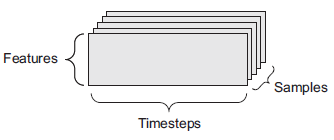

In [7]:
from IPython.display import display, Image
display(Image(filename='3D times series data tensor.PNG', width=300, height=200))

Next let's talk about image data. The key is to understand how image data are stored as tensors. Let’s look at a concrete example of a neural network that uses the Python library 'Keras' to learn to classify handwritten digits. The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself. It’s a set of 60000 training images, plus 10000 test images, assembled by the National Institute of Standards and Technology in the 1980s. The dataset is included in the built-in package so let's load it first:

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The images are encoded as 'numpy.ndarrays', and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.
Let’s look at the training data:

In [9]:
print(train_images.ndim)
print(train_images.shape)
print(len(train_labels))
print(type(train_images))
print(len(train_images[0])) # looking at the first sample
train_labels

3
(60000, 28, 28)
60000
<class 'numpy.ndarray'>
28


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

So what we have here is a 3D tensor of 8-bit integers. More precisely, it’s an array of 60000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255. In the MNIST dataset, samples are images of digits.

Let’s display the fourth digit in this 3D tensor:

9


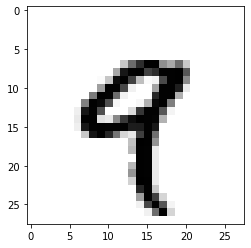

In [10]:
trainlabel_digit = train_labels[4]
print(trainlabel_digit)

train_digit = train_images[4]
plt.imshow(train_digit, cmap=plt.cm.binary)
plt.show()

Images typically have three dimensions: height, width, and color depth. Althoughn grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in 2D tensors, by convention image tensors are always 3D, with a oned-imensional color channel for grayscale images. Thus a batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

There are two conventions for shapes of images tensors: the channels-last convention (used by TensorFlow) and the channels-first convention (used by Theano). The TensorFlow machine-learning framework, from Google, places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, theano places the color depth axis right after the batch axis: (samples, color_depth, height, width). The package 'Keras' provides both options. 

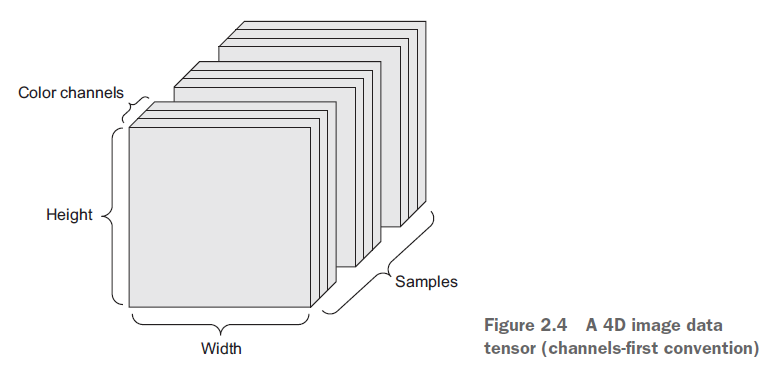

In [11]:
from IPython.display import display, Image
display(Image(filename='4D image data tensor.PNG', width=400, height=300))

Let's take a look at an example of the image data with color. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. Details of the dataset can be found here: https://www.cs.toronto.edu/~kriz/cifar.html. 

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [13]:
print(train_images.ndim)
print(train_images.shape)
print(len(train_labels))
print(type(train_images))

4
(50000, 32, 32, 3)
50000
<class 'numpy.ndarray'>


[1]


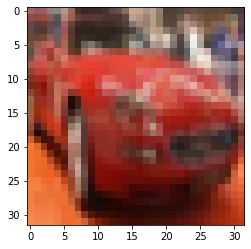

In [14]:
trainlabel_digit = train_labels[5]
print(trainlabel_digit)

train_digit = train_images[5]
plt.imshow(train_digit, cmap=plt.cm.binary)
plt.show()

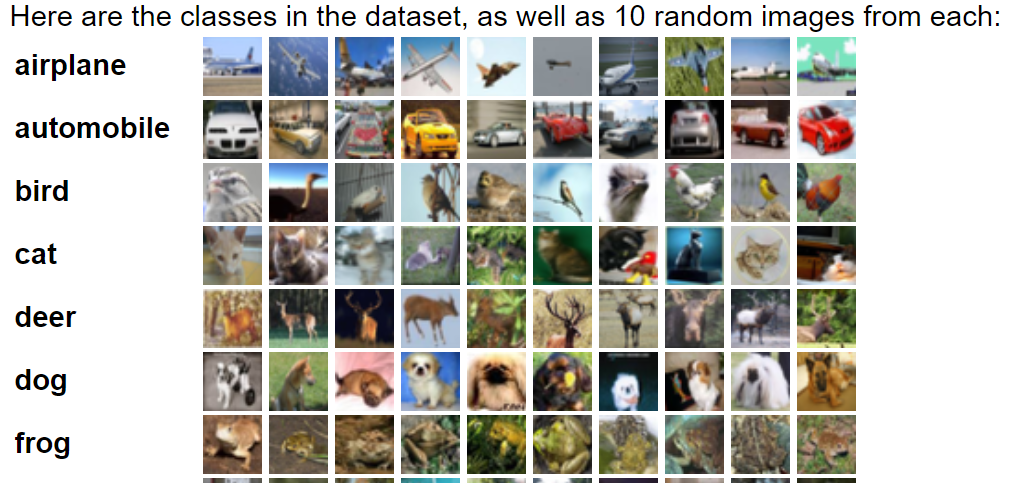

In [15]:
from IPython.display import display, Image
display(Image(filename='small image data example from Keras.PNG', width=500, height=400))

In order to manipulate an image, you need to understand the basics of how computers deal with colors and coordinates in images and how you can work with colors and coordinates. Computer programs often represent a color in an image as an RGBA value. An RGBA value is a group of numbers that specify the amount of red, green, blue, and alpha (or transparency) in a color. Each of these component values is an integer from 0 (none at all) to 255 (the maximum). These RGBA values are assigned to individual **pixels**; a pixel is the smallest dot of a single color the computer screen can show (as you can imagine, there are millions of pixels on a screen). A pixel’s RGB setting tells it precisely what shade of color it should display. Images also have an alpha value to create RGBA values. If an image is displayed on the screen over a background image or desktop wallpaper, the alpha value determines how much of the background you can 'see-through' the image's pixel.

Building on top of image data, we can discuss vidoe data now. Video data is one of the few types of real-world data for which we will need 5D tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a 3D tensor (height, width, color_depth), a sequence of frames can be stored in a 4D tensor (frames, height, width, color_
depth), and thus a batch of different videos can be stored in a 5D tensor of shape (samples, frames, height, width, color_depth). For instance, a 60-second, 144 $\times$ 256 YouTube video clip sampled at 4 frames per second would have 240=4 $\times$ 60 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That is a total of 106,168,320 values. If the
'dtype' of the tensor was 'float32', then each value would be stored in 32 bits, so the tensor would represent 405 MB, which is very heavy. Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format). 

#### III. Tensors Operations in TensorFlow

We have established the concept tensors, now it's time to understand how tensors interact each other. A good resource for this section can be found here: https://www.tensorflow.org/tutorials/customization/basics and https://www.tensorflow.org/guide/tensor. We will study the building blocks of this wonderful deep learning package and then make comparisons between operations in 'numpy'.

To start with, every object in TensorFlow is a tensor. A tensor is a nothing more than a multi-dimensional array. Similar to 'numpy.ndarray' objects, 'tf.Tensor' objects have a data type and a shape. Additionally, 'tf.Tensors' can reside in accelerator memory (like a GPU). The TensorFlow platform offers a rich library of operations (tf.add(), tf.matmul(), tf.linalg.inv() etc.) that consume and produce tf.Tensors. These operations automatically convert native Python types. For example:

In [16]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))
print(tf.square(2) + tf.square(3)) # also supporting operator overloading

type(tf.add(1,3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

Notice that the object above is called 'tensorflow.python.framework.ops.EagerTensor'. It's not a number of course, but an object that has some 'properties' associated. Specifically, each 'tf.Tensor' has a shape and a datatype:

In [17]:
x = tf.matmul([[8]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[16 24]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


The most obvious differences between 'numpy.ndarrays' and 'tf.Tensors' are:
   1. Tensors can be backed by accelerator memory (like GPU, TPU).
   2. Tensors are immutable (so they are like tuples).
   
You can pass string arguments in the tensor as well:

In [18]:
hello=tf.constant('Hello')
world=tf.constant('World')
print(hello) # the b' stands for binary string
type(hello)

tf.Tensor(b'Hello', shape=(), dtype=string)


tensorflow.python.framework.ops.EagerTensor

Converting between a 'tf.Tensors' and a 'numpy.ndarray' is easy:

   1. TensorFlow operations automatically convert 'numpy.ndarrays' to tensors.
   2. Operations of 'numpy' automatically convert tensors 'to numpy.ndarrays'.
   
Tensors are explicitly converted to 'numpy.ndarrays' using their numpy() method. These conversions are typically cheap since the array and tf.Tensor share the underlying memory representation, if possible. However, sharing the underlying representation isn't always possible since the tf.Tensor may be hosted in GPU memory while NumPy arrays are always backed by host memory, and the conversion involves a copy from GPU to host memory. Below are some examples:

In [19]:
hello.numpy()

b'Hello'

In [20]:
one=hello+world
two=one.numpy()
print(two)

b'HelloWorld'


In [21]:
new_tensor=tf.add(1, 2)
print(new_tensor.numpy())
type(new_tensor.numpy())

3


numpy.int32

In [6]:
iden=tf.eye(3)
print(iden.numpy())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
ndarray = np.ones([3, 3])
print("TensorFlow operations convert numpy.ndarrays to Tensors automatically:")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("----------")
print("And numpy operations convert Tensors to numpy.ndarrays automatically:")
print(np.add(tensor, 1))
print(type(np.add(tensor, 1)))

TensorFlow operations convert numpy.ndarrays to Tensors automatically:
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
----------
And numpy operations convert Tensors to numpy.ndarrays automatically:
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
<class 'numpy.ndarray'>


Generating random numbers are also easy, similar to what we can do in 'numpy'. For example, below we create a tensor of a random 3-by-3 matrix whose elements are randomly sampled from a uniform distribution with parameters UNIF(0,1):

In [23]:
x = tf.random.uniform([3, 3], minval=0, maxval=1)
print(x)

tf.Tensor(
[[0.59690475 0.47416425 0.66772175]
 [0.60103786 0.11929262 0.46814215]
 [0.96346164 0.44236052 0.5649829 ]], shape=(3, 3), dtype=float32)


Similarly, a normal draw looks like the following with NORM(0,2.5):

In [24]:
x=tf.random.normal([5], mean=0.0, stddev=2.5)
print(x)

tf.Tensor([-0.02586855  2.1427672  -2.0628617  -3.1837747   2.9765024 ], shape=(5,), dtype=float32)


You can create a tensor named _tensor_ and then call _tensor_.device to check whether there is GPU involved. Many TensorFlow operations are accelerated using the GPU for computation. Without any annotations, TensorFlow automatically decides whether to use the GPU or CPU for an operation—copying the tensor between CPU and GPU memory, if necessary. tf.Tensor objects produced by an operation are typically backed by the memory of the device on which the operation executed.

In [25]:
print("Is the Tensor on GPU?"),
print(x.device.endswith('GPU:0'))

Is the Tensor on GPU?
False


We talked about concepts such as dimensionality and rank. Let's put them in action now. Here is a scalar or 'rank-0' tensor . A scalar contains a single value, and no axes. The 2nd example following the first is a vector. Recall a vector or 'rank-1' tensor is like a list of values. A vector has 1-axis. The third example is a matrix. A matrix or 'rank-2' tensor has 2-axes. The fourth example shows a tensor can have more than 3 axes:

In [26]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [27]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [28]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [29]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


Tensors often contain floats and integers, but have many other types, including: complex numbers and strings. The base 'tf.Tensor' class requires tensors to be "rectangular"; that is, along each axis, every element is the same size. However, there are specialized types of tensors that can handle different shapes such as 'RaggedTensor' or 'Sparsetensor'. We will not go over too much detail here. 

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication. Below are some examples:

In [30]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 0]])

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n") # matrix multiplication 
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 0]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 1]
 [7 3]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 1]
 [7 3]], shape=(2, 2), dtype=int32) 



Tensors can be used in all kinds of mathematical operations. Think of the TensorFlow framework as an extension of the 'numpy' package. But TensorFlow can do way more. See below:

In [31]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

print(tf.reduce_max(c))  # finding the largest value
print(tf.argmax(c)) # finding the index of the largest value
print(tf.nn.softmax(c)) # computing the softmax
print(tf.transpose(c,conjugate=False))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 4. 10.]
 [ 5.  1.]], shape=(2, 2), dtype=float32)


Now let's talk about tensor shapes. To reiterate, the **shape of a tensor** refers to the length (number of elements) of each of the dimensions of a tensor. The **rank of a tensor** is the number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2. **Axis of a tensor** (or **dimension**) refers to the overall dimension of a tensor. The **size of a tensor** is the total number of items in the tensor. Tensors and 'tf.TensorShape' objects have convenient properties for accessing these.

While axes are often referred to by their indices, it's always wise to keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

In [32]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print("Type of every element:", rank_4_tensor.dtype)
print("Number of dimensions/axis:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of dimensions/axis: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


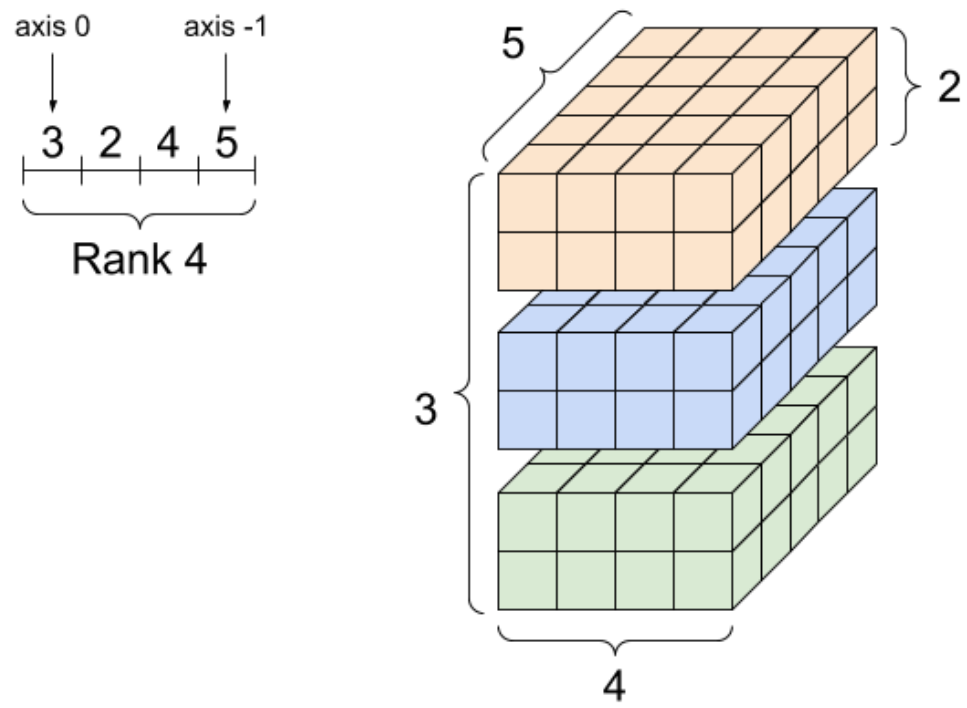

In [33]:
from IPython.display import display, Image
display(Image(filename='tensorshape 3245.PNG', width=300, height=200))

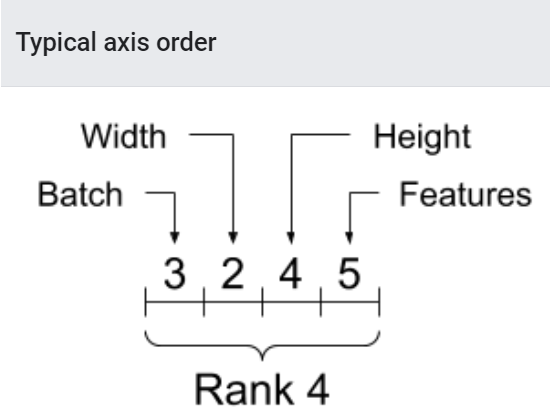

In [34]:
from IPython.display import display, Image
display(Image(filename='tensorflow typical axis order.PNG', width=200, height=1500))

TensorFlow follows standard Python indexing rules, similar to indexing a list or a string in Python, and the basic rules for NumPy indexing:
   - indexes start at 0
   - negative indices count backwards from the end
   - colon punctuation (:), are used for slices (start\:stop\:step)

In [35]:
rank_1_tensor = tf.constant([0, 1, 2, 2.5, 3, 5, 8, 13, 21, 34])

print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

First: 0.0
Second: 1.0
Last: 34.0
Everything: [ 0.   1.   2.   2.5  3.   5.   8.  13.  21.  34. ]
Before 4: [0.  1.  2.  2.5]
From 4 to the end: [ 3.  5.  8. 13. 21. 34.]
From 2, before 7: [2.  2.5 3.  5.  8. ]
Every other item: [ 0.  2.  3.  8. 21.]
Reversed: [34.  21.  13.   8.   5.   3.   2.5  2.   1.   0. ]


We can also do multi-indexing. Higher rank tensors are indexed by passing multiple indices. The single-axis exact same rules as in the single-axis case apply to each axis independently. Here are some examples:

In [36]:
print(rank_2_tensor.numpy(),'\n')
print(rank_2_tensor[1, 1].numpy(),'\n')

print(rank_3_tensor.numpy(),'\n')
print(rank_3_tensor[:, :, 4].numpy(),'\n')

[[1. 2.]
 [3. 4.]
 [5. 6.]] 

4.0 

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]] 

[[ 4  9]
 [14 19]
 [24 29]] 



Because indexing is easy, we can discuss reshaping as well. For example, you can convert a tensor into a Python list. You can also reshape a tensor into a new shape. The tf.reshape() operation is fast and cheap as the underlying data does not need to be duplicated.

In [37]:
y= tf.constant([[1, 2],
                [3, 4],
                [5, 6],
                [7, 8]])
print(y.shape.as_list())

reshaped = tf.reshape(y, [1, 8])
print(reshaped)

[4, 2]
tf.Tensor([[1 2 3 4 5 6 7 8]], shape=(1, 8), dtype=int32)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory. If you flatten a tensor you can see what order it is laid out in memory:

In [38]:
print(rank_3_tensor, '\n')
print(tf.reshape(rank_3_tensor, [-1])) # -1 passed in the shape argument saying "Whatever fits"

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32) 

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


To inspect the data type of a tf.Tensor object, we can use the Tensor.dtype property. When creating a 'tf.Tensor' from a Python object you may optionally specify the datatype. If you don't, TensorFlow chooses a datatype that can represent your data. It converts Python integers to 'tf.int32' and Python floating point numbers to 'tf.float32'. Otherwise it uses the same rules 'numpy' uses when converting to arrays.

In [39]:
y.dtype

tf.int32

Broadcast can also be done just like in 'numpy'. The idea is that under certain conditions, smaller tensors are 'stretched' automatically to fit larger tensors when running combined operations on them. The simplest and most common case is when you attempt to multiply or add a tensor to a scalar. In that case, the scalar is broadcast to be the same shape as the other argument.

In [40]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])

print(tf.multiply(x, 2)) # all of these are the same computation
print(x * y) # this is done through broadcasting
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.

There is a useful function you can use to see what broadcasting looks like using tf.broadcast_to():

In [41]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


There is a special type of tensor called ragged tensor. A **ragged tensor** is a tensor with variable numbers of elements along some axis. This is rarely used. The shape of a tf.RaggedTensor contains unknown dimensions:

In [42]:
ragged_list = [[0, 1, 2, 3],[4, 5],[6, 7, 8],[9]]
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)
print('shape of the ragged tensor: ', ragged_tensor.shape)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>
shape of the ragged tensor:  (4, None)


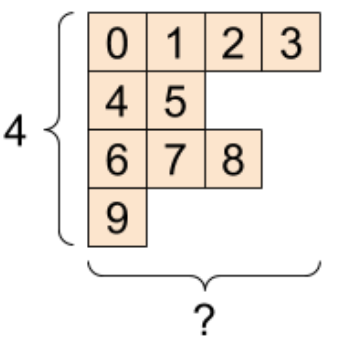

In [43]:
from IPython.display import display, Image
display(Image(filename='Ragged Tensor.PNG', width=100, height=50))

Next we talk about another data type (dtype) called 'tf.string', which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the dimensions of the tensor. 

In [44]:
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
print(tensor_of_strings) # note that the shape is (3,) and the string length is not included.
print(tensor_of_strings.numpy())


tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)
[b'Gray wolf' b'Quick brown fox' b'Lazy dog']


In [45]:
scalar_string_tensor = tf.constant("You cannot just always cry wolf! You must study hard!")
print(scalar_string_tensor)
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor(b'You cannot just always cry wolf! You must study hard!', shape=(), dtype=string)
tf.Tensor(
[b'You' b'cannot' b'just' b'always' b'cry' b'wolf!' b'You' b'must'
 b'study' b'hard!'], shape=(10,), dtype=string)


The last type of tensors is called **sparse tensor**. Just like sparse matrix, sparse tensors makes it easy to store data with lots of 'zeros'. If you have a sparse tensor, you can also convert it back to a dense tensor (the normal tensor you use):

In [46]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

print(tf.sparse.to_dense(sparse_tensor)) # converting sparse tensors to dense tensors


SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


The picture below shows what the created sparse tensor above looks like visually:

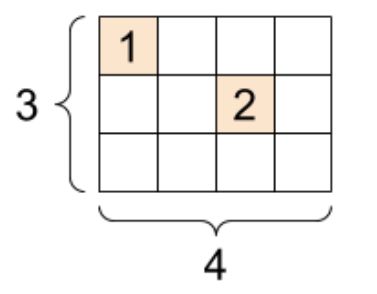

In [47]:
from IPython.display import display, Image
display(Image(filename='Sparse Tensor.PNG', width=100, height=50))

There are another two important functions that often come in handy when it comes to Tensor operations: casting and tiling. The tf.cast() function casts the argument x (in case of Tensor) or x.values (in case of SparseTensor or IndexedSlices) to dtype. Here is an example of casting:

In [4]:
x = tf.constant([1.8, 2.2], dtype=tf.float32)
x_int=tf.cast(x, tf.int32)
x_int.numpy()

array([1, 2])

The operation of tiling is slightly more complicated. The syntax for tiling is tf.tile(_input_, _multiples_). The operation creates a new tensor by replicating _input_ _multiples_ times. The output tensor's $i$'th dimension has input.dims($i$) * _multiples_[$i$] elements, and the values of input are replicated _multiples_[$i$] times along the $i$'th dimension. 

In [5]:
a = tf.constant([[1,2,3],[4,5,6]], tf.int32)
b = tf.constant([1,2], tf.int32)
tf.tile(a, b)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])>

In [9]:
c = tf.constant([[1,2,3],[8,3,5]], tf.int32)
d = tf.constant([2,3], tf.int32)
tf.tile(c, d).numpy()

array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [8, 3, 5, 8, 3, 5, 8, 3, 5],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [8, 3, 5, 8, 3, 5, 8, 3, 5]])

#### References:
   - https://www.tensorflow.org/tutorials/customization/basics
   - https://www.tensorflow.org/guide
   - https://www.tensorflow.org/guide/tensor
   - https://www.tensorflow.org/guide/migrate
   - https://docs.w3cub.com/tensorflow~python/
   - https://www.tensorflow.org/api_docs/python/tf/tile
   - https://www.tensorflow.org/api_docs/python/tf/cast
   - Francois Chollet (2017). Deep Learning with Python. Manning Publications Co.
   